# TOPIC:  Building Complex Models Using Functional API

In [16]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


# 1/ Loading the California_Housing dataset using Skit-Learn

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# load the dataset and split it into: training, test, and validation sets
housing = fetch_california_housing()
X_train_full,X_test,y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)
(5160, 8)
(5160,)


# 2/ Processing data

In [18]:
from sklearn.preprocessing import StandardScaler
# Scaling datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 3/ Building Complex Models Using the Functional API

# 3.1/ One Input - One output

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_9[0][0]              

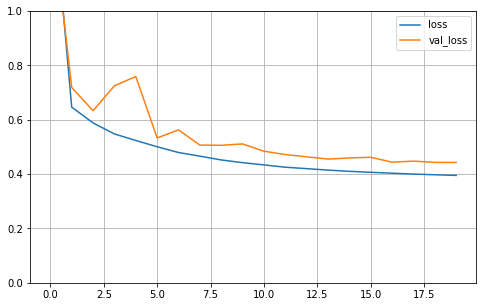

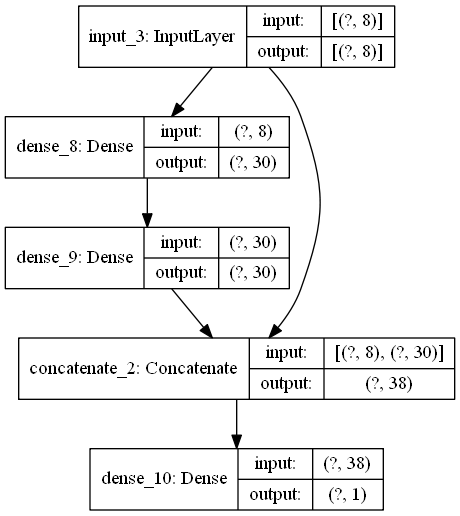

In [20]:
# Create the model
input_ = keras.layers.Input(shape=X_train.shape[1:])
h1 = keras.layers.Dense(30,activation='relu')(input_)
h2 = keras.layers.Dense(30,activation='relu')(h1)
concat = keras.layers.concatenate([input_,h2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

# display the model
print(model.summary())

# Compile the model
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3))

# Training the model
history = model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid))

# Evaluating the model
## plot the learning curves
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



# Testing on the first 5 samples of the testing set
print('TESTING SET:')
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(f'y_pred   : {y_pred.transpose()[0][:]}')
print(f'y_actual : {y_test[:5]}')

keras.utils.plot_model(model, show_shapes=True)

# 3.2/ Two Inputs - One Output
- 5 features through the wide path (features 0 to 4),
- 6 features through the deep path (features 2 to 7)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

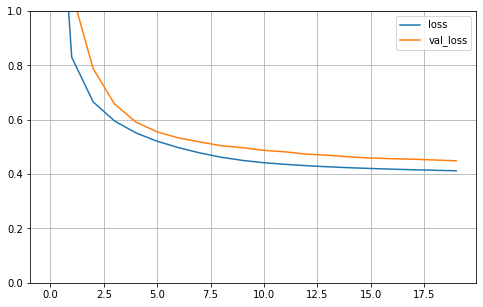

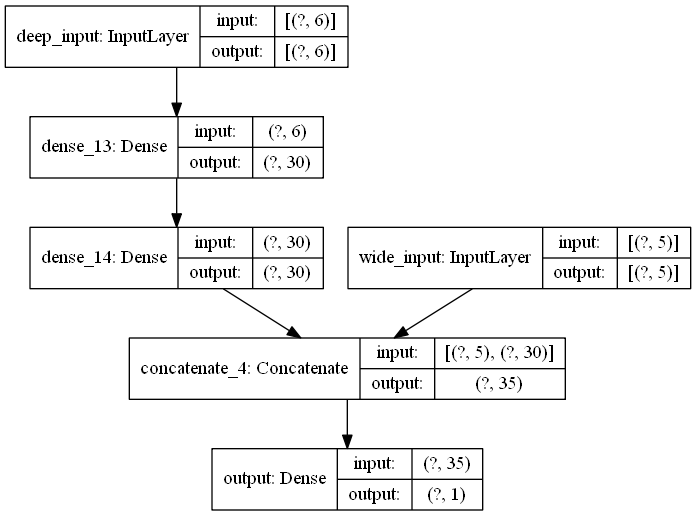

In [22]:
# Create the model
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
h1 = keras.layers.Dense(30,activation='relu')(input_B)
h2 = keras.layers.Dense(30,activation='relu')(h1)
concat = keras.layers.concatenate([input_A,h2])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

print(model.summary())

# Compile the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

# Prepare sets
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

# Training the model
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,
                    validation_data=((X_valid_A,X_valid_B),y_valid))

history_df = pd.DataFrame(history.history)  #plot training & validation curves
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluating the model
print('TESTING SET:')
mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_test_A,X_test_B))
#print(f'y_pred   : {y_pred.transpose()[0][:]}')
#print(f'y_actual : {y_test[:5]}')

keras.utils.plot_model(model, show_shapes=True)

# 3.2/ Two Inputs - Two Outputs
- 5 features through the wide path (features 0 to 4),
- 6 features through the deep path (features 2 to 7)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           930         dense_17[0][0]                   
____________________________________________________________________________________________

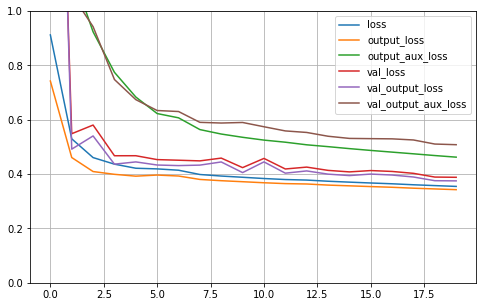

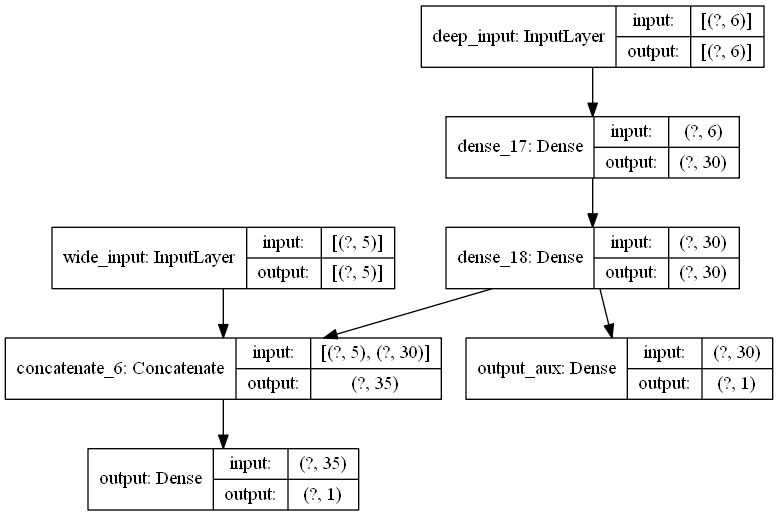

In [24]:
# Create the model
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
h1 = keras.layers.Dense(30,activation='relu')(input_B)
h2 = keras.layers.Dense(30,activation='relu')(h1)
concat = keras.layers.concatenate([input_A,h2])
output = keras.layers.Dense(1,name='output')(concat)
output_aux = keras.layers.Dense(1,name='output_aux')(h2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,output_aux])

print(model.summary())

# Compile the model
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")

# Training the model
history = model.fit([X_train_A,X_train_B],[y_train,y_train],epochs=20,
                    validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))

history_df = pd.DataFrame(history.history)  #plot training & validation curves
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Evaluating the model
print('TESTING SET:')
X_new_A, X_new_B = X_test_A[:5], X_test_B[:5]
y_pred_main,y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main)
print(y_pred_aux)
#print(f'y_pred   : {y_pred.transpose()[0][:]}')
#print(f'y_actual : {y_test[:5]}')

keras.utils.plot_model(model, show_shapes=True)

In [25]:
print(y_test[:5])



[1.221 2.879 3.448 2.809 1.887]
